In [4]:
# Taken from a tutorial: https://www.datacamp.com/community/tutorials/wordcloud-python

import numpy as np
import pandas as pd
from os import path
# from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import bibtexparser

In [6]:
with open('InternationalModelicaConference/abstracts/12.txt') as fil:
    lines = fil.read()

database = bibtexparser.loads(lines)

In [7]:
print('There are {} entries in this database'.format(len(database.entries_dict)))

There are 89 entries in this database


In [8]:
df = pd.DataFrame.from_dict(database.entries_dict)
df.head()

Schichl  \
ENTRYTYPE                                      inproceedings   
ID                                                   Schichl   
abstract   State-of-the-art Modelica implementations may ...   
author     Baharev, Ali and Neumaier, Arnold and Schichl,...   
booktitle  Proceedings of the 12th International Modelica...   

                                                      Ritter  \
ENTRYTYPE                                      inproceedings   
ID                                                    Ritter   
abstract   During aircraft design and certification, one ...   
author                     MÃ¼ller, Reiko and Ritter, Markus   
booktitle  Proceedings of the 12th International Modelica...   

                                                      Reichl  \
ENTRYTYPE                                      inproceedings   
ID                                                    Reichl   
abstract   Transient thermodynamic models in Modelica are...   
author     Emhofer, Johann and Zitzenbacher, Raimund and ...   
booktitle  Proceedings of the 12th International Modelica...   

                                                        Abel  \
ENTRYTYPE                                      inproceedings   
ID                                                      Abel   
abstract   This paper presents a concept for online param...   
author     Gesenhues, Jonas and Hein, Marc and Ketelhut, ...   
booktitle  Proceedings of the 12th International Modelica...   

                                                     Grether  \
ENTRYTYPE                                      inproceedings   
ID                                                   Grether   
abstract   High crosswinds affect the stability of railwa...   
author                 Heckmann, Andreas and Grether, Gustav   
booktitle  Proceedings of the 12th International Modelica...   

                                                      Thomas  \
ENTRYTYPE                                      inproceedings   
ID                                                    Thomas   
abstract   Floating offshore wind turbines are getting mo...   
author               Leimeister, Mareike and Thomas, Philipp   
booktitle  Proceedings of the 12th International Modelica...   

                                                      Aoyama  \
ENTRYTYPE                                      inproceedings   
ID                                                    Aoyama   
abstract   This paper describes a method for early stage ...   
author     Trentelman, Thom and Sutherland, Joshua and Oi...   
booktitle  Proceedings of the 12th International Modelica...   

                                                     HÃ¤rdin  \
ENTRYTYPE                                      inproceedings   
ID                                                   HÃ¤rdin   
abstract   We present a software infrastructure to perfor...   
author               LacoursiÃ¨re, Claude and HÃ¤rdin, Tomas   
booktitle  Proceedings of the 12th International Modelica...   

                                                     Kremers  \
ENTRYTYPE                                      inproceedings   
ID                                                   Kremers   
abstract   The development of complex multi-domain and mu...   
author     Galtier, Virginie and Ianotto, Michel and Cauj...   
booktitle  Proceedings of the 12th International Modelica...   

                                                    Reinbold  \
ENTRYTYPE                                      inproceedings   
ID                                                  Reinbold   
abstract   In recent years, co-simulation has become an i...   
author     Vialle, Stephane and Tavella, Jean-Philippe an...   
booktitle  Proceedings of the 12th International Modelica...   

                                 ...                          \
ENTRYTYPE                        ...                           
ID                               ...                           
abstract   

In [17]:
# Test on a single abstract

text = df.get_values(['abstract', 'Nord'])
print ("There are {} words in this single abstract.".format(len(text)))

TypeError: get_values() takes 1 positional argument but 2 were given

Schichl  \
ENTRYTYPE                                        inproceedings   
ID                                                     Schichl   
abstract     State-of-the-art Modelica implementations may ...   
author       Baharev, Ali and Neumaier, Arnold and Schichl,...   
booktitle    Proceedings of the 12th International Modelica...   
institution  Faculty of Mathematics, University of Vienna, ...   
issn                                                 1650-3740   
keywords     decomposition methods\ndiakoptics\nlarge-scale...   
number                                                     132   
pages                                                  353-362   
publisher    LinkÃ¶ping University Electronic Press, LinkÃ¶...   
title        Failure Modes of Tearing and a Novel Robust Ap...   
year                                                      2017   

                                                        Ritter  \
ENTRYTYPE                                        inproceedings   
ID                                                      Ritter   
abstract     During aircraft design and certification, one ...   
author                       MÃ¼ller, Reiko and Ritter, Markus   
booktitle    Proceedings of the 12th International Modelica...   
institution  DLR, Institute of System Dynamics and Control,...   
issn                                                 1650-3740   
keywords     Virtual flight testing\nFlight control design\...   
number                                                     132   
pages                                                  921-928   
publisher    LinkÃ¶ping University Electronic Press, LinkÃ¶...   
title        Virtual flight testing of a controller for gus...   
year                                                      2017   

                                                        Reichl  \
ENTRYTYPE                                        inproceedings   
ID                                                      Reichl   
abstract     Transient thermodynamic models in Modelica are...   
author       Emhofer, Johann and Zitzenbacher, Raimund and ...   
booktitle    Proceedings of the 12th International Modelica...   
institution  Center for Energy, AIT Austrian Institute of T...   
issn                                                 1650-3740   
keywords     sound\nnoise\nnoise reduction\nacoustics\nheat...   
number                                                     132   
pages                                                  605-612   
publisher    LinkÃ¶ping University Electronic Press, LinkÃ¶...   
title              Sound Source Extension Library for Modelica   
year                                                      2017   

                                                          Abel  \
ENTRYTYPE                                        inproceedings   
ID                                                        Abel   
abstract     This paper presents a concept for online param...   
author       Gesenhues, Jonas and Hein, Marc and Ketelhut, ...   
booktitle    Proceedings of the 12th International Modelica...   
institution  Institute of Automatic Control, RWTH Aachen Un...   
issn                                                 1650-3740   
keywords     Parameter Identification\nMoving Horizon\nFMI ...   
number                                                     132   
pages                                                  613-621   
publisher    LinkÃ¶ping University Electronic Press, LinkÃ¶...   
title        Towards Medical Cyber-Physical Systems: Modeli...   
year                                                      2017   

                                                       Grether  \
ENTRYTYPE                                        inproceedings   
ID                                                     Grether   
abstract     High crosswinds affect the stability of railwa...   
author                   Heckmann, Andreas and Grether, Gustav   
booktitle    Proceedings 

In [10]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("first_review.png")

NameError: name 'text' is not defined

In [12]:
# Now get all abstracts and combine
text = " ".join(df.get_value('abstract', col) for col in df.columns)
print ("There are {} words in the combination of all abstracts.".format(len(text)))

There are 84083 words in the combination of all abstracts.


/home/vmg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


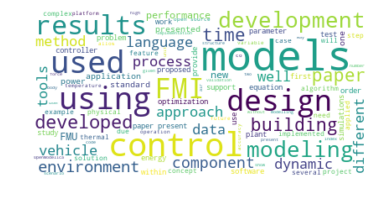

In [22]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['simulation', 'Modelica', 'model', 'system','systems', 'based','result','tool','package','library',])

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("first_review.png")

In [104]:
# Create word cloud from entire proceedings

import os

DIR = 'InternationalModelicaConference/textcleaned'

text_full = ''
text_full_list = {}
for name in os.listdir(DIR):
    if os.path.isfile(os.path.join(DIR, name)):
        with open(os.path.join(DIR, name),'r') as fil:
            temp = fil.read().lower()
        text_full_list[name.replace('.txt','')] = temp
        text_full += ' ' + temp.replace('-\\n')
print ("There are {} words in all files.".format(len(text_full)))

There are 29371240 words in all files.


In [105]:
# Remove all single letter words
text_full = ' '.join( [w for w in text_full.split() if len(w)>1] )

# Remove trailing 's' on words (i.e., words => word)
# text_full = ' '.join(w[:-1] if w[-1]== 's' else w for w in text_full.split() )

In [106]:
print ("There are {} words in all files.".format(len(text_full)))

There are 28424170 words in all files.


In [142]:
# Create stopword list:
stopwords = set(STOPWORDS)

months = ['january','february','march','april','may','june','july','august','september','october','november','december']
locations = ['italy','germany','france','czech','republic','munich','lund','sweden']
numbers = ['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th','11th','12th','13th','14th','15th','16th',
           '17th','18th','19th','20th','21st','22nd','23rd','24th','25th','26th','27th','28th','29th','20th','31st',
           'first','second','third','fourth','fifth','sixth','seventh','eighth','ninth','tenth']
modelica = ['equation','function','type','parameter','component','example','contain','within','real','boolean',
            'string','package','modelica']

stopwords_add = months+locations+numbers+modelica+[
                'proceeding','simulation', 'model', 'system','based','result','tool',
                'library','used','developed','using','approach','present','use',
                'paper','well','one','thu','figure','will','et al','international conference','international',
                'conference','conference september','DOI','two','association','thus','within','et','al']
    
# Additional stopwords based on lists
# - and 's' to end of each word for plurals
# - capitalize each word (REMOVED as added to read step):  + [word.capwords() for word in stopwords_add]
stopwords_add = stopwords_add + [word+'s' for word in stopwords_add]

# Update stopwords
stopwords.update(stopwords_add)

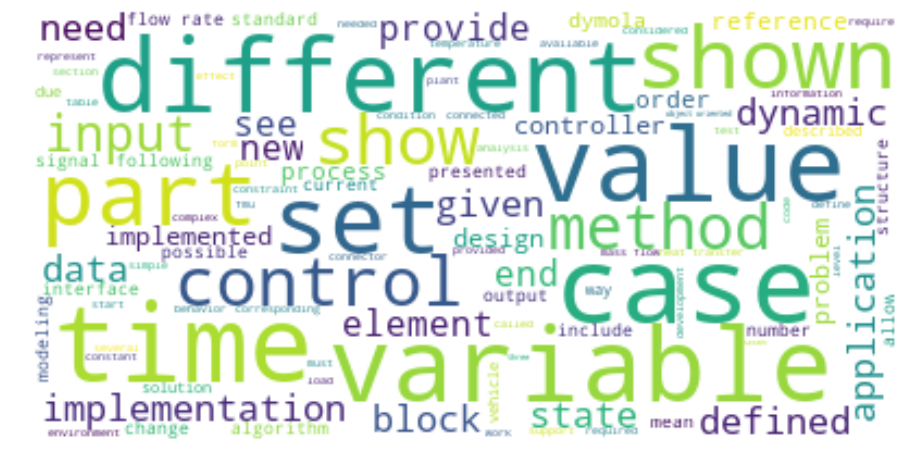

In [109]:
# For entire text

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text_full)

# Display the generated image:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

s = os.path.split(DIR)[:-1]
figName = os.path.join(*s,'plots','text_full')

wordcloud.to_file('{}.png'.format(figName))

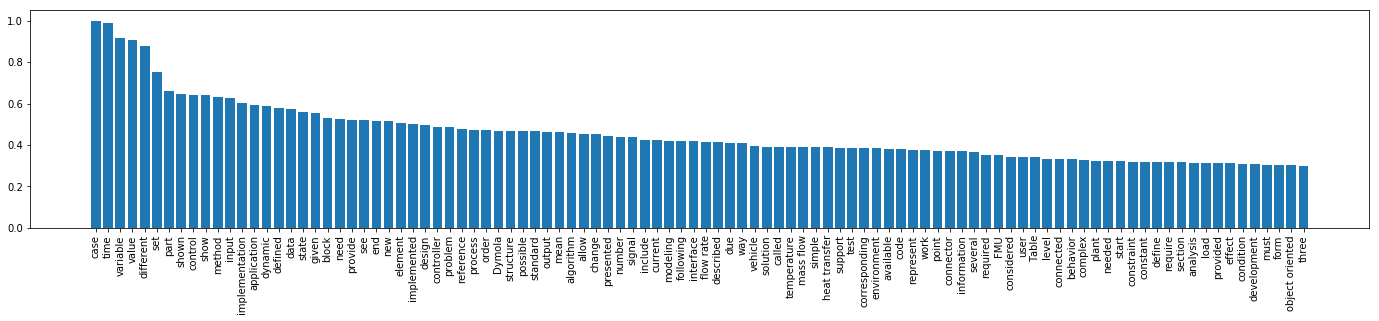

In [99]:
# Bar plot for visualing most common
fig = plt.figure(figsize=(24,4))
plt.bar(wordcloud.words_.keys(),wordcloud.words_.values())
plt.xticks(rotation='vertical');

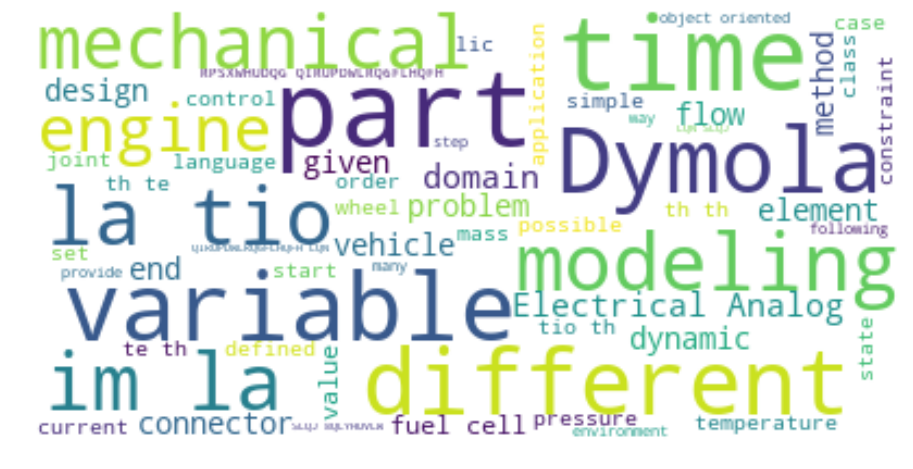

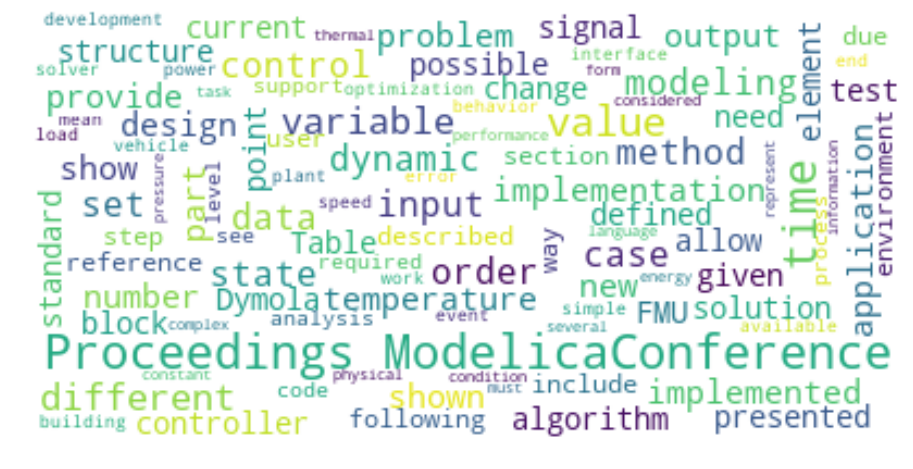

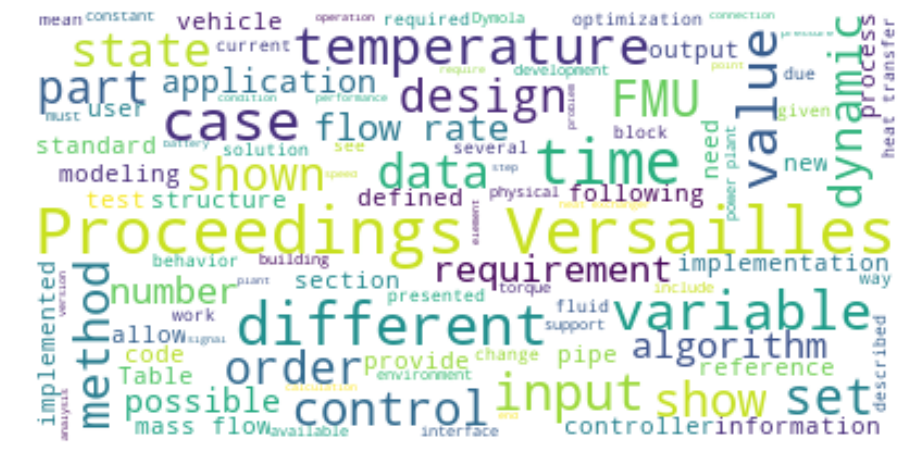

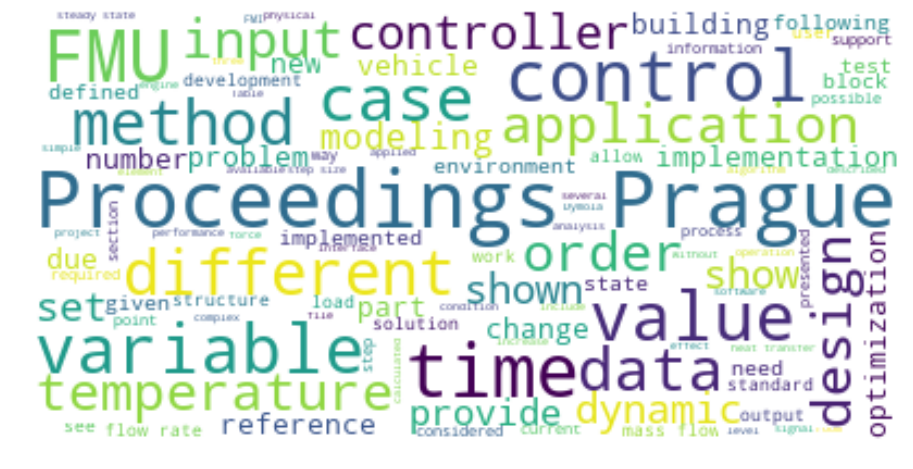

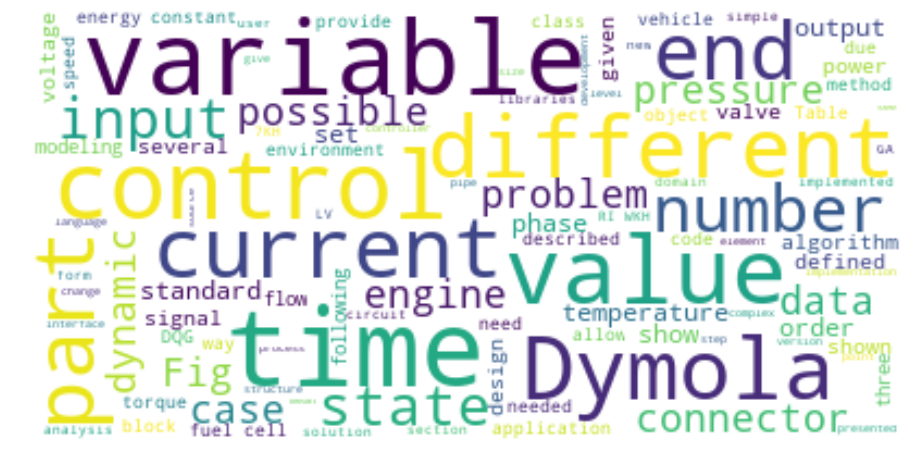

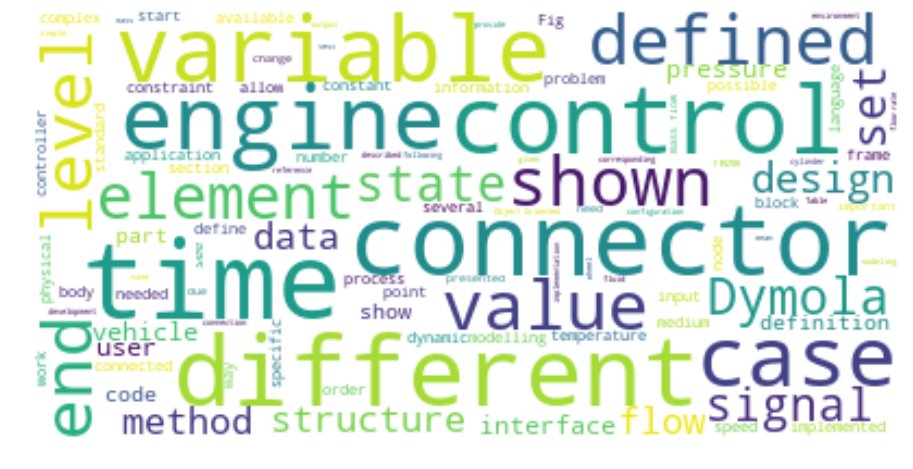

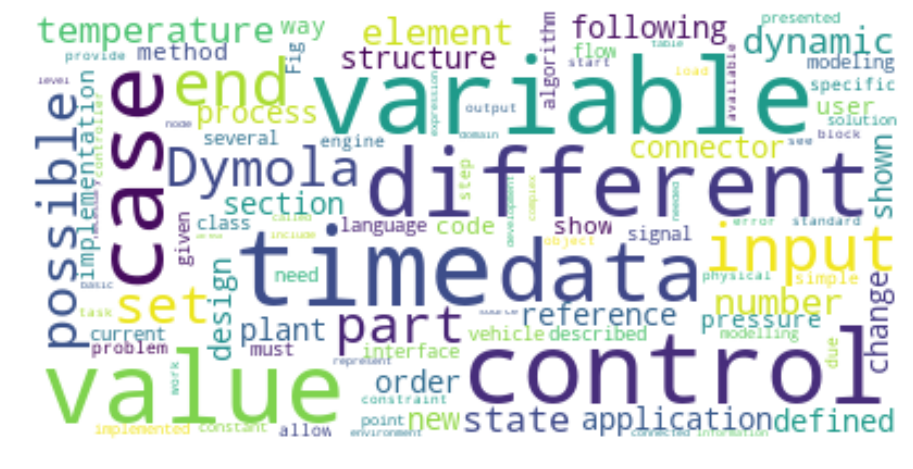

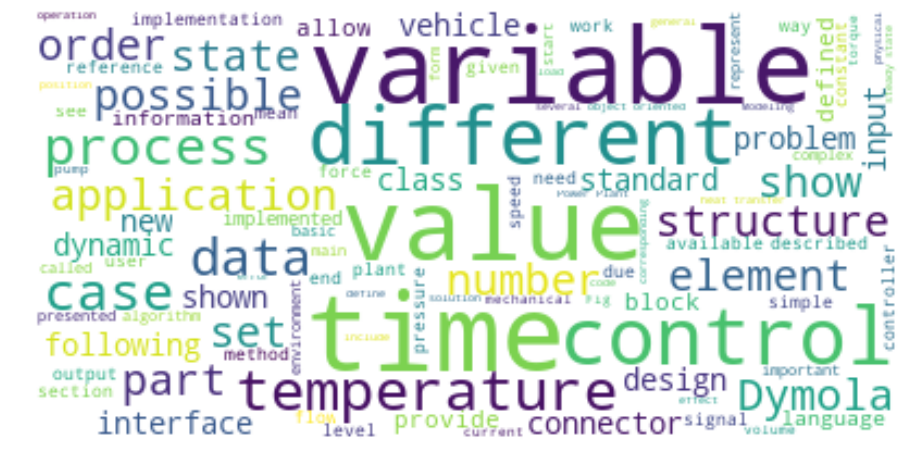

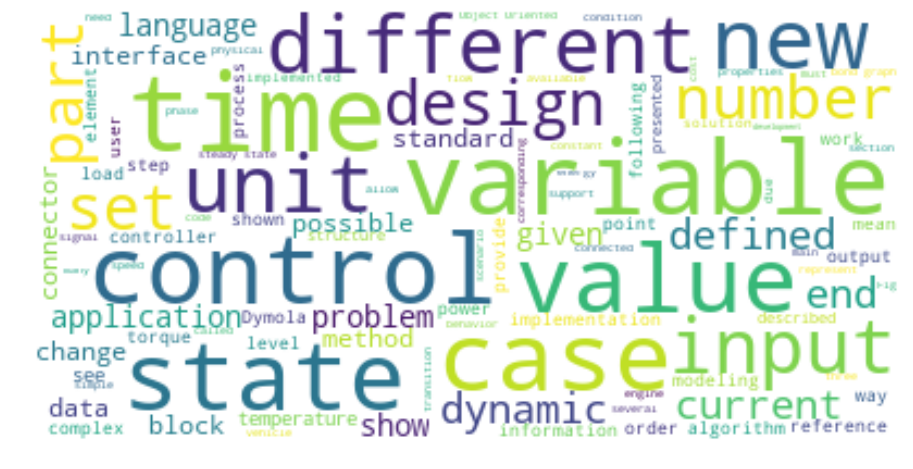

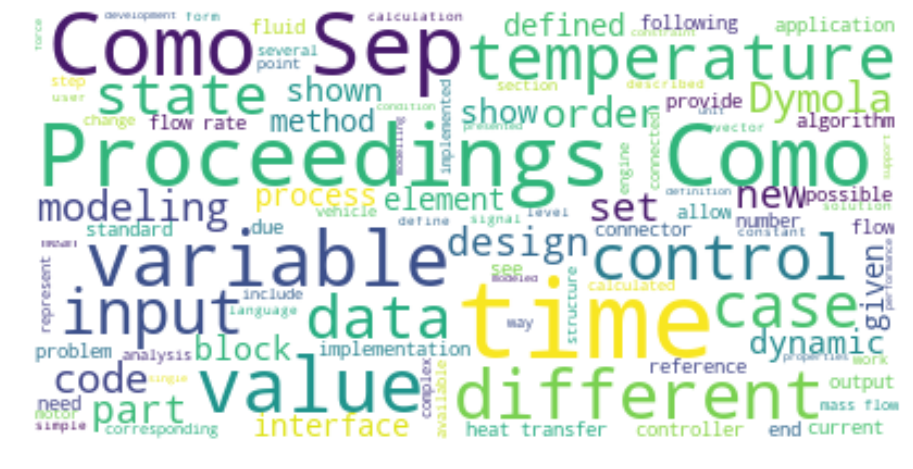

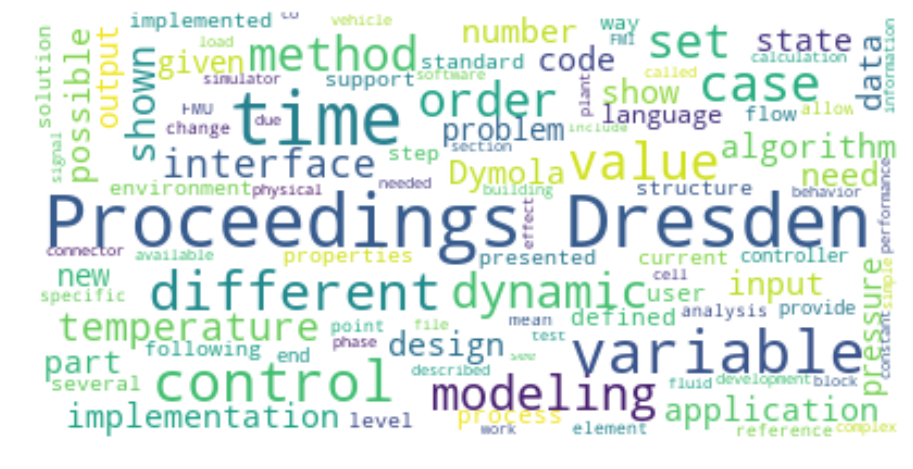

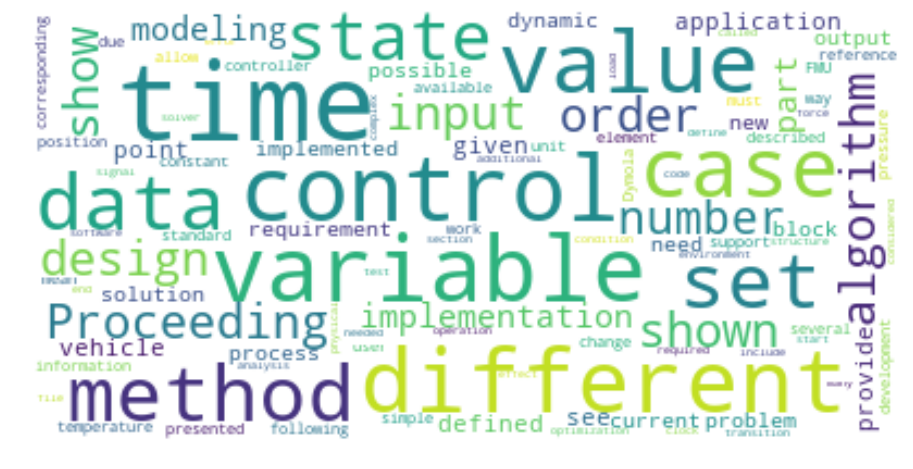

In [100]:
# Per conference text

for key, val in text_full_list.items():
    
    val = ' '.join( [w for w in val.split() if len(w)>1] )
    
    # Generate a word cloud image
    wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(val)

    # Display the generated image:
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    s = os.path.split(DIR)[:-1]
    figName = os.path.join(*s,'plots',key)

    wordcloud.to_file('{}.png'.format(figName))

In [118]:
# Set keywords to be counted
includeWords = ['thermal','hydraulic','fluid','heat','transfer']

In [120]:
# Count number of each of the includeWords
includeWordsCount = dict.fromkeys(includeWords)
for word in includeWords:
    includeWordsCount[word] = text_full.split().count(word)

In [140]:
# # Create list and then string of repeated values to regenerate input for wordCloud
# text_includeWords_list = [key for key, value in includeWordsCount.items() for i in range(value)]
# text_includeWords = ' '.join(text_includeWords_list)

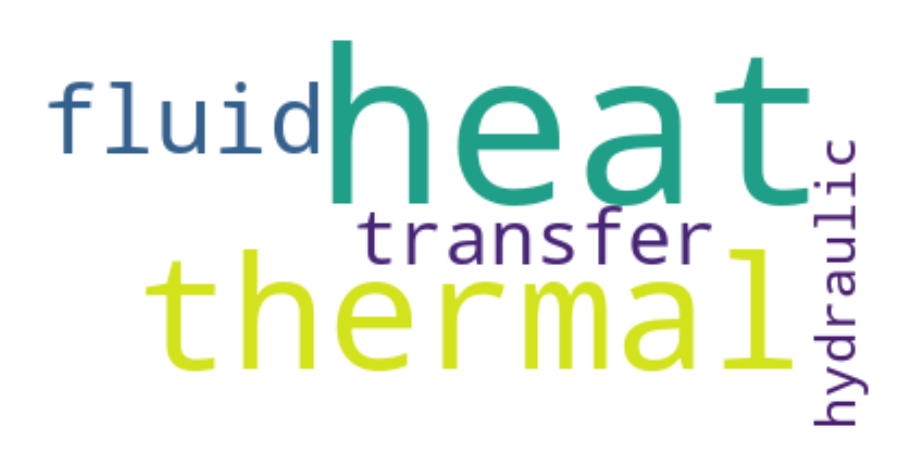

In [154]:
# For entire text

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate_from_frequencies(includeWordsCount)

# Display the generated image:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

s = os.path.split(DIR)[:-1]
figName = os.path.join(*s,'plots','text_includeWords')

wordcloud.to_file('{}.png'.format(figName))